# Session 10: Machine Learning Introduction

*Joachim Kahr Rasmussen*

## What Have We Learned Until Now? (I/II)

Python fundamentals (assignment 0)
- Data types: Integers, strings, booleans, etc.
- Containers: Tuples, lists, dicts, etc.
- Loops: For, while
- Functions

Session 2-3: Data structuring in pandas
- The fundamentals:
    - Introduction to DataFrames and Series and native handling of data types
    - Data representation: Column/row navigation and naming
    - Method chaining: Writing something complicated in few lines
- Cleaning and preparation:
    - Combining data: `merge` (key-based) and `concat`/`join` (index-based)
    - Duplicates and missings: `.dropna()`, `.fillna()`, `.drop_duplicates()` and more
    - Data shape: `.stack()`, `.unstack()`
    - Data aggregation: `.groupby()`, *split-apply-combine*

## What Have We Learned Until Now? (II/II)

Session 4: Plotting in Python
- Exploratory vs. explanatory plots
- The grammar of graphics
- `seaborn` vs `matplotlib` vs `pandas`

Session 5-8: Interacting with the Web and scraping
- String operations
- API vs HTML
- Regex, Selenium

Session 9: Ethics
- Ethical concers: Privacy, statistical discrimination, business ethics, etc.
- Legal concerns: GDPR, consent to data collection
- Hacking

# Questions from Earlier Sessions

I have tried to gather some questions that seemed to address more general issues:
- *4432*

Other questions?


## Where Are We Now?

Recall the wheel of data science - we are now at the "model" part

<br>
<center><img src='https://raw.githubusercontent.com/hadley/r4ds/master/diagrams/data-science.png' alt="Drawing" style="width: 1000px;"/></center>


# Overview of Session 10

Today, we will introduce stastical modelling and the fundamental ideas behind machine learning. In particular, we will cover:
1. An intro to modelling (live)
    - Function fitting
    - Prediction vs inference
    - Underfitting vs overfitting (bias variance trade-off)
2. An intro to machine learning (live)
    - Supervised, unsupervised and reinforcement learning
    - Classification vs regression
    - When can machine learning be helpful?
3. The perceptron learning algorithm
    - The perceptron in theory
    - The perceptron in practice
4. Model Validation
    - Why validation is important
    - Test and train split
5. Beyond the Perceptron
    - Different activation functions (linear, logistic)
    - Gradient descent and onvergence to local/global minimum

# Associated Readings

PML, chapter 1:
- Basic terminology and ML lingo
- Introduction to the three classes of machine learning
- Using Python for machine learning

PML, chapter 2:
- Introduction to artificial neurons
- The perceptron learning algorithm
- Gradient descent for convergence to global/local minimum
- Altering the activation function

PML, chapter 3, section "Modeling class probabilities via logistic regression":
- Reverting to logistic regression as a machine learning approach
- Training a logistic regression model with `scikit-learn` in python
- Dealing with with *overfitting*


# Why We Use Models

## Function Fitting
*What does (supervised) machine learning do?*

Suppose that....
- we have data with some outcome $y$, and
- we want to model/predict this outcome from (a $d\times1$-dimensional matrix/vector of) input features $\mathbf{x}$.

The aim is now to find a function $f$ such that the distance between actual values $y$ and predicted values $f(x)$ are minimized.

*What are some examples used in social sciences?*

- Linear form: $y=x^T\beta$.
- Non-linear form: $y=g(x^T\beta)=1/\left(1+\text{e}^{-\boldsymbol{x}^T\boldsymbol{\beta}}\right)$, e.g. $g$ is a logistic function

where $x$ is a 1-dimensional array of numbers, e.g.
\begin{align}\boldsymbol{x}=[x_0,x_1,x_2,..,x_d]\end{align}

and $x^T\beta=\beta_0+x_1\beta_1+x_2\beta_2+...+x_d\beta_d$ (a linear index / vector dot product)




## Why We Bother

*Why not just stop at visualization?* 

Models combined with formalized statistical methods allow us to:
- get qualified answer about hypothesis using statistics, i.e. causal inference and policy evaluation
- predict things, e.g. sales tomorrow, spread of epidemics, weather
- think about much more complicated relationships than what we can possibly eyeball in a graph

*Do we all bother for the same reasons?*

No, models are pursued with differens aims. Putting it simple:

Suppose we have a linear model, $y=x\beta+\epsilon$.
- A social scientist would generally say:
    - Models teach us something about the world.
    - We want to estimate $\hat{\beta}$ and potentially a distribution
    - Can we make causal inference?
- A data scientist would generally say:
    - Models help us make optimal future decisions and precise predictions, i.e. $\hat{y}$, on new data.  

## Model Fragility (I/V)
Whatever your profession is, you should care about model fragility $-$ or *overfitting*.

To understand this problem, *polynomial regression* is an illustrative starting point:
- Suppose that, for a start, you only have one feature $x$.
- Now, transform this feature into an $n+1$-dimensional polynomial such that  
    $$\boldsymbol{x}=\begin{array}{ccccc}
[1, & x, & , x^2 & \ldots, & x^n\end{array}]^T$$
- By choosing $n$ large enough, you can effectively fit any "regular" curve (similar intuition to high-dimensional Taylor approximations).

## Model Fragility (II/V)

An example: Suppose we build a set of simple models of the population size in Denmark using polynomial regression with different *n*. How do the models perform?
- Fetch data on population sizes in DK from Statistics Denmark.
- Estimate the models with data from 1769-1975...

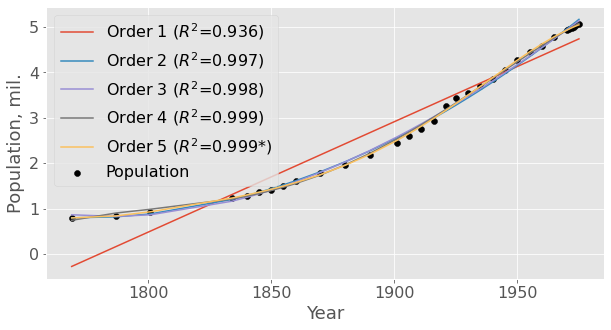

In [10]:
f_pop1

## Model Fragility (III/V)

Clearly, higher order polynomials $\Rightarrow$ better fit!

We may say that the in-sample performance increases in *n*.

Suppose we now want to use each of these models to predict population sizesup until 2021.How well do the models predict?

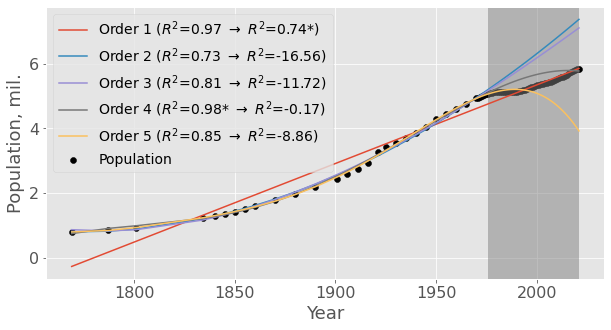

In [8]:
f_pop2

## Model Fragility (IV/V)

The conclusion is clearly different. We may say that the out-of-sample performance decreases in *n*.

By 2050, Denmark will be deserted...

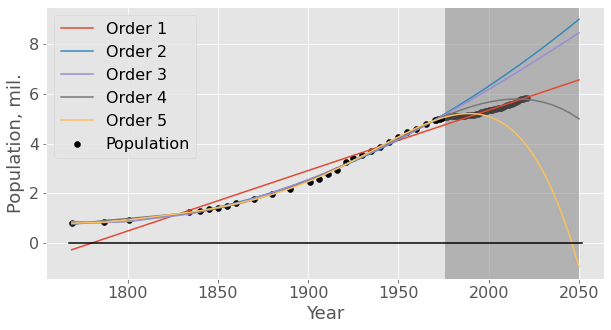

In [11]:
f_pop3

## Model Fragility (V/V)

*What trade-off do we face in making models?*

In general, we say that there are two opposing forces to take into account:
- **Overfitting**: Making a model that is too simple and does not capture enough of data (low *n*)
- **Underfitting**: Making a model with great fit on estimation data, but poor out-of-sample prediction (high *n*).

**General problem**: Fitting a model to idiosyncratic noise.

**The goal of machine learning**: Find models that balances these two problems!

**Note:** This trade-off actually shows up in many situations where thoughts are guided by inductive reasoning.

## What is Machine Learning
*Can you define ML in a very simple way?*

We need to define the three different main paradigms of ML separately:

- Supervised learning
  - Models designed to infer a relationship between input and **labeled** data.      
  - We define the **target** as labels in data that we wish to model (e.g.  population as a function of year)

- Unsupervised learning
  - Find patterns and relationships from **unlabeled** data. 
  - This may involve clustering, dimensionality reduction and more.  
  - *Not part of the course*.

- Reinforcement learning
  - Models to infer optimal behavior in some (potentially) mathematically unknown environment
  - Needs no labeling, and suboptimal behavior is corrected through experience.
  - *Not part of the course*.

## Machine Learning  for Us
*How might this be useful for social scientists?*

Supervised ML is the most **commonly used** of the three paradigms in social sciences, and it is important in this specific field because (elaborated in lecture 14):
- It can improve estimation by **validating models** (not only theory)
- It can **generate new data** (i.e. impute missing)
- It can help us make better (and more flexible!) **predictive models** (finance, macro, demography/education, combat fraud)
- It can be used in hybrid models that leverage machine learning for **causal estimation** (e.g. causal forests, neural estimation, etc.)

## Machine learning outline for this course 

**ML**: Convenient shorthand notation for machine learning.

- **Supervised learning** vs unsupervised learning (vs reinforcement learning)
- **Linear** supervised ML models 
    - classification and regression
    - regularization 
    - **getting hands dirty with implementing solver**
- Fundamental **concepts** of ML
    - overfitting, underfitting, model validation
    - model selection and hyperparameters
- Emphasize differences and synergies between **ML and statistics**
- Brief intro to **non-linear models**

## Supervised ML Problems (I/III)
*How can we categorize different types of supervised ML models?*


Suppose we have model, $y=f\left(x^T\beta\right)$

We then distinguish different models by the `target`variable `y`:
- Regression:
    - Predict a numeric value (the target can be though of as ’continuous’)
    - Target data type will typically be float or int
    - Example of targets:  income, life expectancy, education length (years)
- Classification:
    - Distinguish between non-numeric target categories (the target is binary or a catagory/factor)
    - Target data type can be be str, bool or int
    - Examples of target:  kind of education (linguistics, math), mode of transportation

## Supervised ML Problems (II/III)
*Which one is classification, which one is regression?*

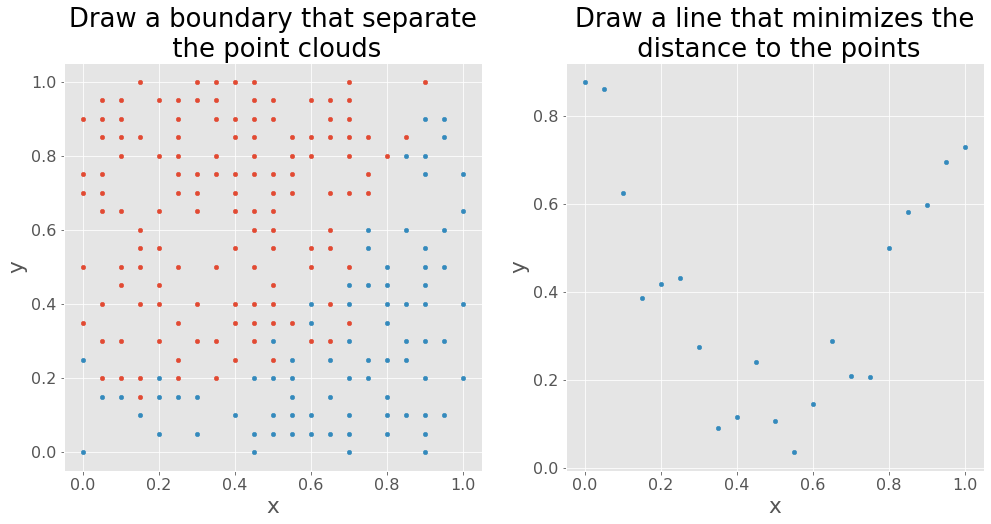

In [16]:
f_identify_question

## Supervised ML Problems (III/III)

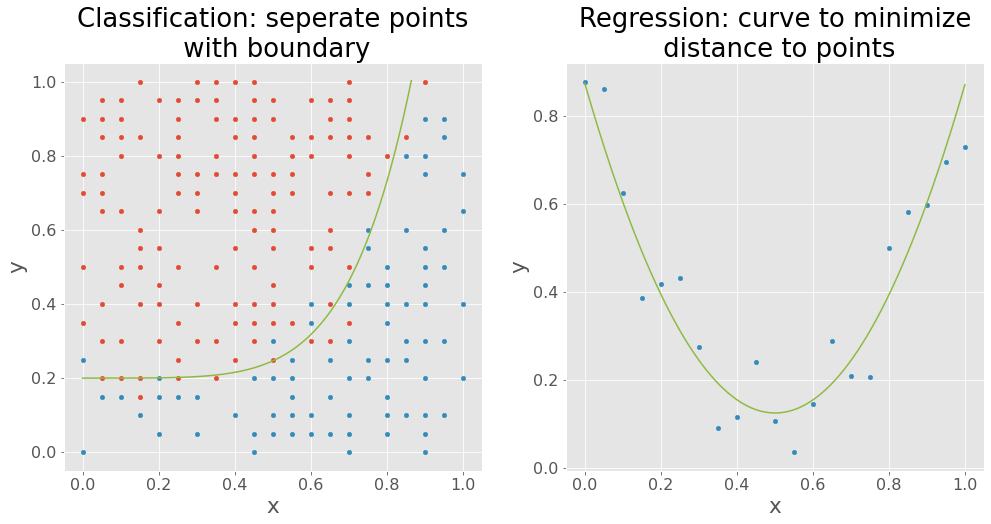

In [17]:
f_identify_answer

## Another Question for You
*Classification or regression?*

Consider the following procedure:
- We load the titanic data. 
- We select variables and make dummy variables from categorical (note: only `class` is categorical)
- We split into target and features. 

Target is: ...? And input features are: ...?

In [28]:
import numpy as np
import pandas as pd
import seaborn as sns

titanic = sns.load_dataset('titanic')
cols = ['survived','class', 'sex', 'sibsp', 'age', 'alone']
titanic_sub = pd.get_dummies(titanic[cols].dropna(), drop_first=True).astype(np.int64)  

X = titanic_sub.drop('survived', axis=1)
y = titanic_sub.survived

# Continuing to the Exercises

In the combined teaching module and exercise set, you will get your first taste of how machine learning algorithms are constructed. 

In particular:
- implement a [_perceptron_](https://en.wikipedia.org/wiki/Perceptron) model from scratch using the matrix-algebra library NumPy
- train this model on the iris data to predict flower types. 